In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

In [ ]:
chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--user-agent="Mozilla/5.0 (Windows Phone 10.0; Android 4.2.1; Microsoft; Lumia 640 XL LTE) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Mobile Safari/537.36 Edge/12.10166"')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
pip install fake-useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=11dbec59b79922b99864762bc33265af9276d41e4be37098a56176381c506ee4
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built fake-useragent


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from fake_useragent import UserAgent

options = Options()
ua = UserAgent()
userAgent = ua.random
print(userAgent)
chrome_options.add_argument(f'user-agent={userAgent}')
#wd = webdriver.Chrome('/content/chromedriver/chromedriver.exe') 


Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36


**ABBIGLIAMENTO UOMO**


In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.nencinisport.it/it/sport/running/abbigliamento/?bk_disabled=true&filters[466][]=1084")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


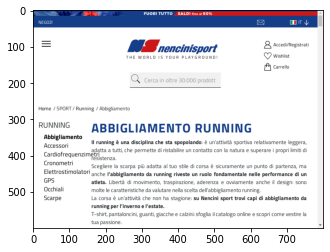

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
print(len(list_products))

90


In [ ]:
def parse_product(product):
    name = product.find_elements_by_css_selector("h5.card-title.productsList__item--title")[0].text
    url = product.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item>a")[0].get_attribute("href")
    product_id = product.get_attribute("data-clerk-product-id")
    gender = "man"
    
   
    return {'url': url,
          'name': name,
          'product_id':product_id,
          'gender':gender}

In [ ]:
import time
detail_products = []
for num in tqdm(range(1,5)):
  time.sleep(1)
  wd.get(f"https://www.nencinisport.it/it/sport/running/abbigliamento/?bk_disabled=true&filters[466][]=1084&resultpage={num}")
  wd.save_screenshot(f'screenshot_{num}.png')
  list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
  for product in list_products:
    detail_products.append(parse_product(product))

print(len(detail_products))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



278


In [ ]:
import pandas as pd
ds_detail_products = pd.DataFrame(detail_products)
ds_detail_products.set_index("product_id")
ds_detail_products.head()

,url,name,product_id,gender
0,https://www.nencinisport.it/it/booster-visiera...,BOOSTER VISIERA,440502,man
1,https://www.nencinisport.it/it/new-balance-imp...,NEW BALANCE IMPACT RUN SS,435901,man
2,https://www.nencinisport.it/it/under-armour-in...,UNDER ARMOUR INTERNATIONAL RUN DAY GX TEE,435859,man
3,https://www.nencinisport.it/it/under-armour-qu...,UNDER ARMOUR QUALIFIER SHORTSLEEVE,435847,man
4,https://www.nencinisport.it/it/under-armour-la...,UNDER ARMOUR LAUNCH SW 7' PRINTED SHORT,435845,man


In [ ]:
ds_detail_products.to_csv('ds_man_clothing_products.csv')

In [ ]:
ds_detail_products = pd.read_csv("ds_man_clothing_products.csv", index_col="product_id")
ds_detail_products.head()

,Unnamed: 0,url,name,gender
product_id,,,,
440502,0,https://www.nencinisport.it/it/booster-visiera...,BOOSTER VISIERA,man
435901,1,https://www.nencinisport.it/it/new-balance-imp...,NEW BALANCE IMPACT RUN SS,man
435859,2,https://www.nencinisport.it/it/under-armour-in...,UNDER ARMOUR INTERNATIONAL RUN DAY GX TEE,man
435847,3,https://www.nencinisport.it/it/under-armour-qu...,UNDER ARMOUR QUALIFIER SHORTSLEEVE,man
435845,4,https://www.nencinisport.it/it/under-armour-la...,UNDER ARMOUR LAUNCH SW 7' PRINTED SHORT,man


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from random import randint
import time
details = []
colour=""
for product_id, product in tqdm(ds_detail_products.iterrows(), total=ds_detail_products.shape[0]):
    time.sleep(randint(1,10))
    link = product["url"]
    name = product["name"]
    gender = product["gender"]
    #print(link)
    wd.set_window_size(1920, 1080)
    try: 
      wd.get(link)
    except:
      continue

   
    try: 
      wd.find_elements_by_css_selector("div.text-center div.btn-more.btn")[0].click()
    except:
      continue
    wd.save_screenshot(f'screenshot_{id}.png')
    try:
      colour = wd.find_element_by_css_selector("span.dot-color img").get_attribute("alt")
    except:
      colour='non disponibile'
    try:
      tipo = wd.find_element_by_css_selector("div.product__data--title>h4").text
    except:
      tipo ='non disponibile'
    try:
      Detail = wd.find_element_by_css_selector("div.tab-content.d-flex.justify-content-center").text
    except:
      Detail='non disponibile'
    try:
      discount_price=wd.find_elements_by_css_selector("span.priceDiscount")[0].text
    except:
      discount_price='non disponibile'
    try:
      price=wd.find_elements_by_css_selector("span.priceFull")[0].text
    except:
      price=discount_price
    
 
    
    details.append({'product_id': product_id,
                    'colour': colour,
                    'gender': gender,
                    'name': name,
                    'Detail': Detail,
                    'tipo': tipo,
                    'price':price,
                    'discount_price':discount_price})
  
len(details)
pprint.pprint(details)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



[{'Detail': 'La visiera evo BV SPORT bianco è stata progettata specificamente '
            "per gli sport all'aperto. \n"
            'Leggera, traspirante e confortevole, si distingue soprattutto per '
            "l'ampia visiera che protegge adeguatamente gli occhi e il viso "
            'dai raggi UV o dalla luce eccessiva. \n'
            'Il tessuto interno sulla fronte assorbe il sudore e quindi evita '
            "qualsiasi disagio durante l'allenamento e le competizioni. \n"
            'Mentre la parte posteriore elastica permette di avere una visiera '
            'che si adatta sempre bene, si adatta a tutti i tipi di testa e '
            'garantisce una vestibilità ottimale durante le sessioni '
            'sportive. \n'
            "Questa visiera leggera e ventilata è l'accessorio indispensabile "
            'da abbinare ai tuoi outfit sportivi per le tue sessioni di trail, '
            'running, hiking, ciclismo, outdoor fitness.\n'
            '100% poliestere.

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("product_id")
ds_details.head()

,product_id,colour,gender,name,Detail,tipo,price,discount_price
0,440502,Giallo,man,BOOSTER VISIERA,La visiera evo BV SPORT bianco è stata progett...,VISIERA,,"€ 24,00"
1,435901,Blu,man,NEW BALANCE IMPACT RUN SS,Creata per il tuo stile di vita sempre in movi...,T-SHIRT RUNNING UOMO,"€ 35,00","€ 31,50"
2,435859,Bianco,man,UNDER ARMOUR INTERNATIONAL RUN DAY GX TEE,Il tessuto morbido e ultra leggero offre la ma...,T-SHIRT RUNNING UOMO,"€ 37,00","€ 18,50"
3,435847,Verde,man,UNDER ARMOUR QUALIFIER SHORTSLEEVE,Il tessuto ultra leggero presenta un esclusivo...,T-SHIRT RUNNING UOMO,"€ 45,00","€ 22,50"
4,435845,Verde,man,UNDER ARMOUR LAUNCH SW 7' PRINTED SHORT,Short UA Launch SW Printed 17 cm da uomo.\nTes...,SHORTS RUNNING UOMO,"€ 45,00","€ 22,50"


In [ ]:
ds_details.to_csv("ds_manclothing_product_details.csv")

In [ ]:
import time
import requests
from random import randint

detail_products = []
list_images = []

for num in tqdm(range(1,5)):
  time.sleep(randint(1,10))
  wd.get(f"https://www.nencinisport.it/it/sport/running/abbigliamento/?bk_disabled=true&filters[466][]=1084&resultpage={num}")
  list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
  for product in list_products:
    try:
      product_id = product.get_attribute("data-clerk-product-id")
      #print(product_id)
      src = product.find_element_by_css_selector("a.p-rel img").get_attribute("src")
      #print(src)
      list_images.append({"product_id": product_id,
                          "img_file": "img_" + str(product_id) + ".jpg"})
      headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
      #print(list_images)
      img_file = requests.get(src, headers=headers)
      #print(img_file)
      if img_file.status_code == 200:
        with open("/content/vestiti_foto/img_" + str(product_id) + ".jpg", 'wb') as f:
          f.write(img_file.content)
    except Exception as e:
      print(e)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
print(len(list_images))

278


In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("product_id")
ds_images.head()

,product_id,img_file
0,440502,img_440502.jpg
1,435901,img_435901.jpg
2,435859,img_435859.jpg
3,435847,img_435847.jpg
4,435845,img_435845.jpg


In [ ]:
ds_images.to_csv("/content/ds_images_vestiti_uomo.csv")

**MAN SHOES**

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.nencinisport.it/it/sport/running/scarpe/?bk_disabled=true&filters[466][]=1084")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
import time
detail_products = []
wd.get(f"https://www.nencinisport.it/it/sport/running/scarpe/?bk_disabled=true&filters[466][]=1084")
wd.save_screenshot(f'screenshot_{num}.png')
list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
for product in list_products:
  detail_products.append(parse_product(product))

print(len(detail_products))

90


In [ ]:
import pandas as pd
ds_detail_products = pd.DataFrame(detail_products)
ds_detail_products.set_index("product_id")
ds_detail_products.head()

,url,name,product_id,gender
0,https://www.nencinisport.it/it/altra-m-torin-4...,ALTRA M TORIN 4.5,442244,man
1,https://www.nencinisport.it/it/altra-m-lone-pe...,ALTRA M LONE PEAK 4.5,442243,man
2,https://www.nencinisport.it/it/altra-m-torin-4...,ALTRA M TORIN 4.5,442241,man
3,https://www.nencinisport.it/it/nike-zoom-winfl...,NIKE ZOOM WINFLO 7,438580,man
4,https://www.nencinisport.it/it/mizuno-wave-ins...,MIZUNO WAVE INSPIRE 16,437080,man


In [ ]:
ds_detail_products.to_csv('ds_man_shoes_products.csv')

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from random import randint
import time
details = []
colour=""
for product_id, product in tqdm(ds_detail_products.iterrows(), total=ds_detail_products.shape[0]):
    time.sleep(randint(1,10))
    link = product["url"]
    name = product["name"]
    gender = product["gender"]
    product_id = product["product_id"]
    
    #print(link)
    wd.set_window_size(1920, 1080)
    try: 
      wd.get(link)
    except:
      continue

   
    try: 
      wd.find_elements_by_css_selector("div.text-center div.btn-more.btn")[0].click()
    except:
      continue
    wd.save_screenshot(f'screenshot_{id}.png')
    try:
      colour = wd.find_element_by_css_selector("span.dot-color img").get_attribute("alt")
    except:
      colour='non disponibile'
    try:
      tipo = wd.find_element_by_css_selector("div.product__data--title>h4").text
    except:
      tipo ='non disponibile'
    try:
      Detail = wd.find_element_by_css_selector("div.tab-content.d-flex.justify-content-center").text
    except:
      Detail='non disponibile'
    try:
      discount_price=wd.find_elements_by_css_selector("span.priceDiscount")[0].text
    except:
      discount_price='non disponibile'
    try:
      price=wd.find_elements_by_css_selector("span.priceFull")[0].text
    except:
      price=discount_price
    
 
    
    details.append({'product_id':product_id,
                    'colour': colour,
                    'gender': gender,
                    'name': name,
                    'Detail': Detail,
                    'tipo': tipo,
                    'price':price,
                    'discount_price':discount_price})
  
len(details)
pprint.pprint(details)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



[{'Detail': 'Ottieni le tue prestazioni migliori con le Torin 4.5 Plush. '
            'Questo modello aggiornato è stato realizzato con la stessa '
            'intersuola e la suola premium del precedente modello per una '
            'calzata leggera, reattiva e scorrevole. La nuova tomaia in '
            'maglia, confortevole e traspirante, rende la scarpa più leggera '
            'di 30 grammi rispetto al precedente modello Plush. Comfort '
            'premium, cuscinetto di alta qualità, leggera e avvolgente: la '
            'Torin 4.5 Plush sarà la compagna fedele di tutte le tue prossime '
            'avventure su strada.\n'
            '  Peso: 9.1 oz / 258 g\n'
            'Soletta: Plantare scolpito in PU Premium da 5mm\n'
            'Intersuola: Quantic™\n'
            'Suola: Tecnologia FootPod™\n'
            'Ammortizzazione: Alta\n'
            'Altezza dello stack: 28 mm\n'
            'Tomaia: Maglia tecnica traspirante\n'
            'RIDUCI',
  'colour': 'Gia

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("product_id")
ds_details.head()

,product_id,colour,gender,name,Detail,tipo,price,discount_price
0,442244,Giallo,man,ALTRA M TORIN 4.5,Ottieni le tue prestazioni migliori con le Tor...,SCARPA RUNNING UOMO,"€ 150,00","€ 135,00"
1,442243,Grigio,man,ALTRA M LONE PEAK 4.5,La versione aggiornata del nostro primo modell...,SCARPA TRAIL RUNNING UOMO,"€ 140,00","€ 126,00"
2,442241,Rosso,man,ALTRA M TORIN 4.5,Ottieni le tue prestazioni migliori con le Tor...,SCARPA RUNNING UOMO,"€ 150,00","€ 135,00"
3,438580,Blu,man,NIKE ZOOM WINFLO 7,AMMORTIZZAZIONE SOTTO IL PIEDE PER LE CORSE LU...,SCARPA RUNNING UOMO,"€ 101,00","€ 60,60"
4,437080,Nero,man,MIZUNO WAVE INSPIRE 16,La reinterpretazione di un'icona quotidiana. L...,SCARPA RUNNING UOMO,"€ 145,00","€ 130,50"


In [ ]:
ds_details.to_csv("ds_man_shoes_product_details.csv")

In [ ]:
import time
import requests
from random import randint

detail_products = []
list_images = []
wd.get(f"https://www.nencinisport.it/it/sport/running/scarpe/?bk_disabled=true&filters[466][]=1084")
list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
for product in list_products:
  try:
    product_id = product.get_attribute("data-clerk-product-id")
      #print(product_id)
    src = product.find_element_by_css_selector("a.p-rel img").get_attribute("src")
      #print(src)
    list_images.append({"product_id": product_id,
                          "img_file": "img_" + str(product_id) + ".jpg"})
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
      #print(list_images)
    img_file = requests.get(src, headers=headers)
      #print(img_file)
    if img_file.status_code == 200:
      with open("/content/vestiti_foto/img_" + str(product_id) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)

In [ ]:
print(len(list_images))

90


In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("product_id")
ds_images.head()

,product_id,img_file
0,442244,img_442244.jpg
1,442243,img_442243.jpg
2,442241,img_442241.jpg
3,438580,img_438580.jpg
4,437080,img_437080.jpg


In [ ]:
ds_images.to_csv("/content/ds_man_shoes_images.csv")

**ABBIGLIAMENTO DONNA**

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.nencinisport.it/it/sport/running/abbigliamento/?bk_disabled=true&filters[466][]=1085")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
def parse_product(product):
    name = product.find_elements_by_css_selector("h5.card-title.productsList__item--title")[0].text
    url = product.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item>a")[0].get_attribute("href")
    product_id = product.get_attribute("data-clerk-product-id")
    gender = "woman"
    
   
    return {'url': url,
          'name': name,
          'product_id': product_id,
          'gender':gender}

In [ ]:
import time
detail_products = []
for num in tqdm(range(1,4)):
  time.sleep(1)
  wd.get(f"https://www.nencinisport.it/it/sport/running/abbigliamento/?bk_disabled=true&orderBy=Sconto&orderWay=DESC&filters[466][]=1085&resultpage={num}")
  wd.save_screenshot(f'screenshot_{num}.png')
  list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
  for product in list_products:
    detail_products.append(parse_product(product))

print(len(detail_products))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



253


In [ ]:
import pandas as pd
ds_detail_products = pd.DataFrame(detail_products)
ds_detail_products.set_index("product_id")
ds_detail_products.head()

,url,name,product_id,gender
0,https://www.nencinisport.it/it/nike-pro-core-i...,NIKE PRO CORE II COMNPRESSION CAPRI DONNA,54675,woman
1,https://www.nencinisport.it/it/gore-sunlight-l...,GORE SUNLIGHT LADY SHIRT,185970,woman
2,https://www.nencinisport.it/it/nike-printed-4-...,NIKE PRINTED 4'' RIVAL SHORT,143488,woman
3,https://www.nencinisport.it/it/underarmour-ua-...,UNDERARMOUR UA STRETCH WOVEN SKORT,186877,woman
4,https://www.nencinisport.it/it/asics-silver-ti...,ASICS SILVER TIGHT,432652,woman


In [ ]:
ds_detail_products.to_csv("ds_woman_clothing_product.csv")

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from random import randint
import time
details = []
colour=""
for product_id,product in tqdm(ds_detail_products.iterrows(), total=ds_detail_products.shape[0]):
    time.sleep(randint(1,10))
    link = product["url"]
    name = product["name"]
    gender = product["gender"]
    product_id = product["product_id"]
    #print(link)
    wd.set_window_size(1920, 1080)
    try: 
      wd.get(link)
    except:
      print(product[name], errore)
      continue

   
    try: 
      wd.find_elements_by_css_selector("div.text-center div.btn-more.btn")[0].click()
    except:
      continue
    wd.save_screenshot(f'screenshot_{id}.png')
    try:
      colour = wd.find_element_by_css_selector("span.dot-color img").get_attribute("alt")
    except:
      colour='non disponibile'
    try:
      tipo = wd.find_element_by_css_selector("div.product__data--title>h4").text
    except:
      tipo ='non disponibile'
    try:
      Detail = wd.find_element_by_css_selector("div.tab-content.d-flex.justify-content-center").text
    except:
      Detail='non disponibile'
    try:
      discount_price=wd.find_elements_by_css_selector("span.priceDiscount")[0].text
    except:
      discount_price='non disponibile'
    try:
      price=wd.find_elements_by_css_selector("span.priceFull")[0].text
    except:
      price=discount_price
    
 
    
    details.append({'product_id': product_id,
                    'colour': colour,
                    'gender': gender,
                    'name': name,
                    'Detail': Detail,
                    'tipo': tipo,
                    'price':price,
                    'discount_price':discount_price})
  
print(len(details))
pprint.pprint(details)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



205
[{'Detail': 'NIKE PRO CORE II COMPRESSION Capri - Donna\n'
            '\n'
            'Capri Nike Pro Core: aderenza e versatilità\n'
            '\n'
            'I capri Nike Pro Core II Compression - Donna sono pensati per '
            'essere indossati da soli o sotto la divisa. La vestibilità '
            'contenitiva ed elasticizzata, la struttura con cuciture piatte e '
            'il tessuto traspirante assicurano un comfort extra durante gli '
            'allenamenti o le gare.\n'
            '\n'
            'Vantaggi\n'
            '\n'
            '    Tessuto Dri-FIT per favorire la traspirazione e mantenere la '
            'pelle fresca e asciutta\n'
            '    Design contenitivo per garantire comfort e sostegno\n'
            '    Punto vita elastico per una vestibilità aderente ed elegante\n'
            "    Cuciture piatte per ridurre l'irritazione causata da "
            'sfregamento\n'
            '    Tassello al cavallo per una libertà di movime

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("product_id")
ds_details.head()

,product_id,colour,gender,name,Detail,tipo,price,discount_price
0,54675,Rosso,woman,NIKE PRO CORE II COMNPRESSION CAPRI DONNA,NIKE PRO CORE II COMPRESSION Capri - Donna\n\n...,NIKE PRO CORE II COMPRESSION CAPRI,"€ 35,00","€ 13,95"
1,185970,Blu,woman,GORE SUNLIGHT LADY SHIRT,Grazie ad un design minimalista e al tessuto m...,T-SHIRT RUNNING DONNA,"€ 69,95","€ 29,95"
2,143488,Nero,woman,NIKE PRINTED 4'' RIVAL SHORT,Elastico in vita.\nCordoncino interno di regol...,SHORT RUNNING DONNA,"€ 45,00","€ 19,95"
3,186877,Bianco,woman,UNDERARMOUR UA STRETCH WOVEN SKORT,Tessuto traspirante.\nVita elastica.\nShort in...,GONNA RUNNING DONNA,"€ 65,00","€ 29,95"
4,320211,Nero,woman,PRO TOUCH ROSITA IV WMS T-SHIRT S/S,"T-shirt running donna, girocollo.\nTessuto tra...",T-SHIRT RUNNING DONNA,"€ 29,99","€ 14,99"


In [ ]:
ds_details.to_csv("ds_womanclothing_product_details.csv")

In [ ]:
import time
import requests
from random import randint

detail_products = []
list_images = []

for num in tqdm(range(1,4)):
  time.sleep(randint(1,10))
  wd.get(f"https://www.nencinisport.it/it/sport/running/abbigliamento/?bk_disabled=true&orderBy=Sconto&orderWay=DESC&filters[466][]=1085&resultpage={num}")
  list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
  for product in list_products:
    try:
      product_id = product.get_attribute("data-clerk-product-id")
      #print(product_id)
      src = product.find_element_by_css_selector("a.p-rel img").get_attribute("src")
      #print(src)
      list_images.append({"product_id": product_id,
                          "img_file": "img_" + str(product_id) + ".jpg"})
      headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
      #print(list_images)
      img_file = requests.get(src, headers=headers)
      #print(img_file)
      if img_file.status_code == 200:
        with open("/content/vestiti_foto/img_" + str(product_id) + ".jpg", 'wb') as f:
          f.write(img_file.content)
    except Exception as e:
      print(e)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
print(len(list_images))

90


In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("product_id")
ds_images.head()

,product_id,img_file
0,54675,img_54675.jpg
1,185970,img_185970.jpg
2,143488,img_143488.jpg
3,186877,img_186877.jpg
4,432652,img_432652.jpg


In [ ]:
ds_images.to_csv("/content/ds_images_woman.csv")

**SCARPE DONNA**

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.nencinisport.it/it/sport/running/scarpe/?bk_disabled=true&filters[466][]=1085")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
import time
detail_products = []
wd.get(f"https://www.nencinisport.it/it/sport/running/scarpe/?bk_disabled=true&filters[466][]=1085")
wd.save_screenshot(f'screenshot_{num}.png')
list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
for product in list_products:
  detail_products.append(parse_product(product))

print(len(detail_products))

90


In [ ]:
import pandas as pd
ds_detail_products = pd.DataFrame(detail_products)
ds_detail_products.set_index("product_id")
ds_detail_products.head()

,url,name,product_id,gender
0,https://www.nencinisport.it/it/altra-w-torin-4...,ALTRA W TORIN 4.5,442240,woman
1,https://www.nencinisport.it/it/mizuno-wave-pro...,MIZUNO WAVE PRODIGY 3 W,437055,woman
2,https://www.nencinisport.it/it/mizuno-wave-ult...,MIZUNO WAVE ULTIMA 11 W,437053,woman
3,https://www.nencinisport.it/it/mizuno-wave-rid...,MIZUNO WAVE RIDER 24 W 16,437052,woman
4,https://www.nencinisport.it/it/mizuno-wave-sky...,MIZUNO WAVE SKY 4 W,437051,woman


In [ ]:
ds_detail_products.to_csv("ds_woman_shoes_product.csv")

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from random import randint
import time
details = []
colour=""
for product_id, product in tqdm(ds_detail_products.iterrows(), total=ds_detail_products.shape[0]):
    time.sleep(randint(1,10))
    link = product["url"]
    name = product["name"]
    gender = product["gender"]
    product_id = product["product_id"]
    #print(link)
    wd.set_window_size(1920, 1080)
    try: 
      wd.get(link)
    except:
      continue

   
    try: 
      wd.find_elements_by_css_selector("div.text-center div.btn-more.btn")[0].click()
    except:
      continue
    wd.save_screenshot(f'screenshot_{id}.png')
    try:
      colour = wd.find_element_by_css_selector("span.dot-color img").get_attribute("alt")
    except:
      colour='non disponibile'
    try:
      tipo = wd.find_element_by_css_selector("div.product__data--title>h4").text
    except:
      tipo ='non disponibile'
    try:
      Detail = wd.find_element_by_css_selector("div.tab-content.d-flex.justify-content-center").text
    except:
      Detail='non disponibile'
    try:
      discount_price=wd.find_elements_by_css_selector("span.priceDiscount")[0].text
    except:
      discount_price='non disponibile'
    try:
      price=wd.find_elements_by_css_selector("span.priceFull")[0].text
    except:
      price=discount_price
    
 
    
    details.append({'product_id': product_id,
                    'colour': colour,
                    'gender': gender,
                    'name': name,
                    'Detail': Detail,
                    'tipo': tipo,
                    'price':price,
                    'discount_price':discount_price})
  
len(details)
pprint.pprint(details)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



[{'Detail': 'Abbiamo portato il modello Torin a livelli altissimi. Questa '
            'versione aggiornata della Torin 4.5 Plush è stata creata per '
            'garantirti prestazioni eccellenti e durature. Abbiamo mantenuto '
            'la stessa intersuola e la suola del precedente modello Plush, '
            'rendendo la scarpa più leggera di 30 grammi. La nuova tomaia in '
            'maglia, leggera e altamente traspirante, offre una calzata '
            'migliorata, più confortevole e avvolgente. Se cerchi una scarpa '
            'da strada scorrevole, veloce, leggera e reattiva, la Torin 4.5 '
            'Plush è la scarpa perfetta.\n'
            '  Peso: 7.4 oz / 210 g\n'
            'Soletta: Plantare scolpito in PU Premium da 5mm\n'
            'Intersuola: Quantic™\n'
            'Suola: Tecnologia FootPod™\n'
            'Ammortizzazione: Alta\n'
            'Altezza dello stack: 28 mm\n'
            'Tomaia: Maglia tecnica traspirante\n'
            'RIDUCI',


In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("product_id")
ds_details.head()

,product_id,colour,gender,name,Detail,tipo,price,discount_price
0,442240,Grigio,woman,ALTRA W TORIN 4.5,Abbiamo portato il modello Torin a livelli alt...,SCARPA RUNNING DONNA,"€ 150,00","€ 135,00"
1,437055,Nero,woman,MIZUNO WAVE PRODIGY 3 W,Preparati a un'esperienza di corsa superlativa...,SCARPA RUNNING DONNA,"€ 110,00","€ 88,00"
2,437053,Nero,woman,MIZUNO WAVE ULTIMA 11 W,Progettata per darti l'esperienza di corsa più...,SCARPA RUNNING DONNA,"€ 140,00","€ 126,00"
3,437052,Grigio,woman,MIZUNO WAVE RIDER 24 W 16,DESCRIZIONE:\nMizuno ridefinisce la sensazion...,RUNNING DONNA,"€ 155,00","€ 139,50"
4,437051,Nero,woman,MIZUNO WAVE SKY 4 W,XPOP PU foam e Mizuno Foam Wave si uniscono pe...,SCARPA RUNNING DONNA,"€ 175,00","€ 157,50"


In [ ]:
ds_details.to_csv("ds_woman_shoes_product_details.csv")

In [ ]:
import time
import requests
from random import randint

detail_products = []
list_images = []
wd.get(f"https://www.nencinisport.it/it/sport/running/scarpe/?bk_disabled=true&filters[466][]=1085")
list_products = wd.find_elements_by_css_selector("div.col-6.col-md-4.col-xl-3.card.productsList__item")
for product in list_products:
  try:
    product_id = product.get_attribute("data-clerk-product-id")
      #print(product_id)
    src = product.find_element_by_css_selector("a.p-rel img").get_attribute("src")
      #print(src)
    list_images.append({"product_id": product_id,
                          "img_file": "img_" + str(product_id) + ".jpg"})
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
      #print(list_images)
    img_file = requests.get(src, headers=headers)
      #print(img_file)
    if img_file.status_code == 200:
      with open("/content/vestiti_foto/img_" + str(product_id) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("product_id")
ds_images.head()

,product_id,img_file
0,442240,img_442240.jpg
1,437055,img_437055.jpg
2,437053,img_437053.jpg
3,437052,img_437052.jpg
4,437051,img_437051.jpg


In [ ]:
ds_images.to_csv("/content/ds_images_woman_shoes.csv")

In [ ]:
!zip -r "/content/vestiti_uomo_nencini_foto.zip" "/content/vestiti_uomo_nencini_foto/"

updating: content/vestiti_uomo_nencini_foto/ (stored 0%)
updating: content/vestiti_uomo_nencini_foto/img_289044.jpg (deflated 5%)
updating: content/vestiti_uomo_nencini_foto/img_363746.jpg (deflated 14%)
updating: content/vestiti_uomo_nencini_foto/img_432681.jpg (deflated 9%)
updating: content/vestiti_uomo_nencini_foto/img_341618.jpg (deflated 4%)
updating: content/vestiti_uomo_nencini_foto/img_379474.jpg (deflated 6%)
updating: content/vestiti_uomo_nencini_foto/img_364073.jpg (deflated 2%)
updating: content/vestiti_uomo_nencini_foto/img_364075.jpg (deflated 2%)
updating: content/vestiti_uomo_nencini_foto/img_382328.jpg (deflated 5%)
updating: content/vestiti_uomo_nencini_foto/img_362528.jpg (deflated 9%)
updating: content/vestiti_uomo_nencini_foto/img_435845.jpg (deflated 4%)
updating: content/vestiti_uomo_nencini_foto/img_191579.jpg (deflated 5%)
updating: content/vestiti_uomo_nencini_foto/img_370480.jpg (deflated 8%)
updating: content/vestiti_uomo_nencini_foto/img_313880.jpg (deflat

In [ ]:
import pandas as pd
ds_man_clothes = pd.read_csv("/content/ds_man_clothing_products.csv", index_col="product_id")
ds_man_clothes.head()

,Unnamed: 0,url,name,gender
product_id,,,,
440502,0,https://www.nencinisport.it/it/booster-visiera...,BOOSTER VISIERA,man
435901,1,https://www.nencinisport.it/it/new-balance-imp...,NEW BALANCE IMPACT RUN SS,man
435859,2,https://www.nencinisport.it/it/under-armour-in...,UNDER ARMOUR INTERNATIONAL RUN DAY GX TEE,man
435847,3,https://www.nencinisport.it/it/under-armour-qu...,UNDER ARMOUR QUALIFIER SHORTSLEEVE,man
435845,4,https://www.nencinisport.it/it/under-armour-la...,UNDER ARMOUR LAUNCH SW 7' PRINTED SHORT,man


In [ ]:
import pandas as pd
ds_woman_clothes = pd.read_csv("/content/ds_woman_clothing_product.csv", index_col="product_id")
ds_woman_clothes.head()

,Unnamed: 0,url,name,gender
product_id,,,,
54675,0,https://www.nencinisport.it/it/nike-pro-core-i...,NIKE PRO CORE II COMNPRESSION CAPRI DONNA,woman
185970,1,https://www.nencinisport.it/it/gore-sunlight-l...,GORE SUNLIGHT LADY SHIRT,woman
143488,2,https://www.nencinisport.it/it/nike-printed-4-...,NIKE PRINTED 4'' RIVAL SHORT,woman
186877,3,https://www.nencinisport.it/it/underarmour-ua-...,UNDERARMOUR UA STRETCH WOVEN SKORT,woman
432652,4,https://www.nencinisport.it/it/asics-silver-ti...,ASICS SILVER TIGHT,woman


In [ ]:
ds_man_shoes = pd.read_csv("ds_man_shoes_products.csv", index_col="product_id")

In [ ]:
ds_woman_shoes = pd.read_csv("ds_woman_shoes_product.csv", index_col="product_id")

In [ ]:
ds_products = pd.concat([ds_man_shoes,ds_woman_clothes,ds_woman_shoes,ds_man_clothes], ignore_index=False)
ds_products.head()

,Unnamed: 0,url,name,gender
product_id,,,,
442244,0,https://www.nencinisport.it/it/altra-m-torin-4...,ALTRA M TORIN 4.5,man
442243,1,https://www.nencinisport.it/it/altra-m-lone-pe...,ALTRA M LONE PEAK 4.5,man
442241,2,https://www.nencinisport.it/it/altra-m-torin-4...,ALTRA M TORIN 4.5,man
438580,3,https://www.nencinisport.it/it/nike-zoom-winfl...,NIKE ZOOM WINFLO 7,man
437080,4,https://www.nencinisport.it/it/mizuno-wave-ins...,MIZUNO WAVE INSPIRE 16,man


In [ ]:
ds_products.to_csv('ds_products.csv')

In [ ]:
ds_man_shoes_details = pd.read_csv("/content/ds_man_shoes_product_details.csv", index_col="product_id")
ds_woman_shoes_details = pd.read_csv("/content/ds_woman_shoes_product_details.csv", index_col="product_id")
ds_man_clothes_details = pd.read_csv("/content/ds_manclothing_product_details.csv", index_col="product_id")
ds_woman_clothes_details = pd.read_csv("/content/ds_womanclothing_product_details.csv", index_col="product_id")
print(len(ds_man_shoes_details))
print(len(ds_woman_shoes_details))
print(len(ds_man_clothes_details))
print(len(ds_woman_clothes_details))

82
88
205
199


In [ ]:
ds_product_details=pd.concat([ds_man_shoes_details,ds_woman_shoes_details,ds_man_clothes_details,ds_woman_clothes_details], ignore_index=False)
ds_product_details.head()

,Unnamed: 0,colour,gender,name,Detail,tipo,price,discount_price
product_id,,,,,,,,
442244,0,Giallo,man,ALTRA M TORIN 4.5,Ottieni le tue prestazioni migliori con le Tor...,SCARPA RUNNING UOMO,"€ 150,00","€ 135,00"
442243,1,Grigio,man,ALTRA M LONE PEAK 4.5,La versione aggiornata del nostro primo modell...,SCARPA TRAIL RUNNING UOMO,"€ 140,00","€ 126,00"
442241,2,Rosso,man,ALTRA M TORIN 4.5,Ottieni le tue prestazioni migliori con le Tor...,SCARPA RUNNING UOMO,"€ 150,00","€ 135,00"
438580,3,Blu,man,NIKE ZOOM WINFLO 7,AMMORTIZZAZIONE SOTTO IL PIEDE PER LE CORSE LU...,SCARPA RUNNING UOMO,"€ 101,00","€ 60,60"
437080,4,Nero,man,MIZUNO WAVE INSPIRE 16,La reinterpretazione di un'icona quotidiana. L...,SCARPA RUNNING UOMO,"€ 145,00","€ 130,50"


In [ ]:
ds_product_details.to_csv('/content/ds_products_details.csv')

In [ ]:
ds_man_shoes_images = pd.read_csv("/content/ds_man_shoes_images.csv", index_col="product_id")
ds_woman_shoes_images = pd.read_csv("/content/ds_images_woman_shoes.csv", index_col="product_id")
ds_man_clothes_images = pd.read_csv("/content/ds_images_vestiti_uomo.csv", index_col="product_id")
ds_woman_clothes_images = pd.read_csv("/content/ds_images_woman.csv", index_col="product_id")

In [ ]:
ds_images = pd.concat([ds_man_clothes_images,ds_woman_clothes_images,ds_man_shoes_images, ds_woman_shoes_images ], ignore_index=False)
ds_images.head()

,Unnamed: 0,img_file
product_id,,
440502,0,img_440502.jpg
435901,1,img_435901.jpg
435859,2,img_435859.jpg
435847,3,img_435847.jpg
435845,4,img_435845.jpg


In [ ]:
ds_images.to_csv('ds_images.csv')